<a href="https://colab.research.google.com/github/mohamed-abdo74/Analyze-A-B-Test/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Name: </b> Mohamed Abdo Mohamed Ahmed Mahran
<br>
<b> Department: </b> Pure Mathematics & Computer Science (CS)
<br> 
<b> ID: </b> 20181038
<br>
<b> Project: </b> Handwritten Digits Recognition
<br>


# ***Introduction*** 
<blockquote>
In this prject, I have created a model that recognizes digits from 0 to 9 by using the concept of <b>Artificial Neural Network (ANN)</b>.<br>
Specially, I've used <b>Convolutional Neural Network (CNN) </b> to recognize the images which contain digits. <br>
The following figure shows that the mechanism of the CNN.
</blockquote>

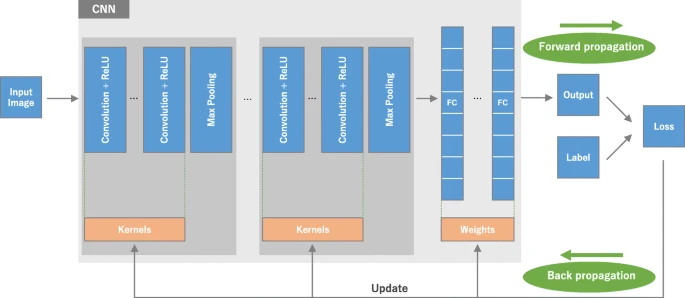

<center>=========================================================</center>

<blockquote>
In <b> CNN </b>, every Image is represented in the form of an array of pixel values as following.
</blockquote>

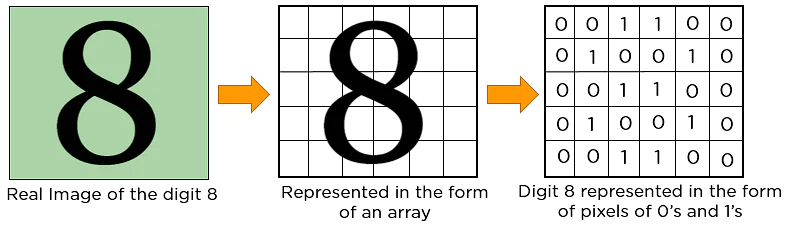

<center>=========================================================</center>

<blockquote>
The following figure shows that the process (<b>Convolution operations</b>) on the digit to recognize it. (For Example the digit 7)
</blockquote>

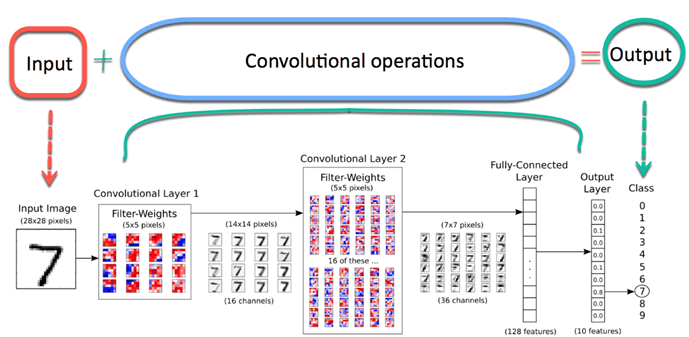

<center>=========================================================</center>

# **Import Packages**
#### Initially, I import the necessary packages which used in the project
###### **1- Numpy Library**
###### **2- Tensorflow Library**
###### **3- Matplotlib Library**


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# **Loading Data**
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [ ]:
# mnist is the basically handwritten characters based on 28 * 28 sized images of 0 to 9
mnist = tf.keras.datasets.mnist

# **Divide Dataset into Training Set and Test Set**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Training Set size
print("Size of Training Set = {} elemnts".format(x_train.shape[0]))

Size of Training Set = 60000 elemnts


In [ ]:
# Test Set size
print("Size of Test size = {} elements".format(x_test.shape[0]))

Size of Test size = 10000 elements


# **Check and Show the Dataset**

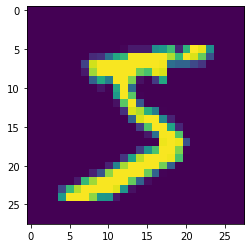

In [ ]:
plt.imshow(x_train[0])
plt.show()

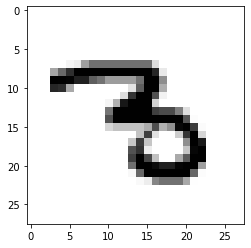

In [ ]:
plt.imshow(x_train[30], cmap= plt.cm.binary);

In [ ]:
print(y_train[0])
print(y_train[30])

5
3


# **Data Preprocessing**

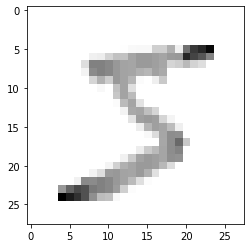

In [ ]:
# Its gray image and all values varies from 0 to 255 in order to normalize it
x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)
plt.imshow(x_train[0], cmap = plt.cm.binary);

In [ ]:
# Resizing image to make it suitable for apply Convolution Operation
IMG_SIZE = 28
x_trainer = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_tester = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
print("Training Sample Dimension is : {}".format(x_trainer.shape))
print("Testing Sample Dimension is : {}".format(x_tester.shape))

Training Sample Dimension is : (60000, 28, 28, 1)
Testing Sample Dimension is : (10000, 28, 28, 1)


# **Creating a Deep Nueral Network**

In [ ]:
# Creating a nueral network
model = Sequential()

In [ ]:
# First Convolution Layer 0 1 2 3 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3), input_shape = x_trainer.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Second Convolution Layer 
model.add(Conv2D(64, (3,3))) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Third Convolution Layer 
model.add(Conv2D(64, (3,3))) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# Fully Connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [ ]:
# Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

In [ ]:
# Last Fully Connected Layer 
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
# Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Training The Model
model.fit(x_trainer, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.3281 - accuracy: 0.8958 - val_loss: 0.1339 - val_accuracy: 0.9581
Epoch 2/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.1056 - accuracy: 0.9671 - val_loss: 0.0950 - val_accuracy: 0.9708
Epoch 3/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0737 - accuracy: 0.9776 - val_loss: 0.0842 - val_accuracy: 0.9737
Epoch 4/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0751 - val_accuracy: 0.9773
Epoch 5/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0671 - val_accuracy: 0.9806


In [ ]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print("Test Loss on 10,000 test Samples = {}".format(test_loss))
print("Validation Accuracy on 10,000 test Samples = {}".format(test_acc))

313/313 [==============================] - 4s 14ms/step - loss: 0.0662 - accuracy: 0.9805
Test Loss on 10,000 test Samples = 0.06617264449596405
Validation Accuracy on 10,000 test Samples = 0.9804999828338623


# **Predictions**

In [ ]:
predictions = model.predict([x_tester])

In [ ]:
print(predictions)

[[1.2338204e-08 7.8392565e-10 5.2980427e-06 ... 9.9999452e-01
  3.2264788e-10 6.0511773e-08]
 [6.0674342e-06 5.6190474e-06 9.9959129e-01 ... 6.5658369e-06
  3.1072774e-05 3.0537649e-06]
 [7.5710062e-07 9.9986589e-01 9.5026517e-06 ... 1.1054235e-06
  2.1010679e-05 4.5601979e-07]
 ...
 [1.2646086e-08 7.8168270e-08 1.7680811e-07 ... 1.9790591e-06
  1.2278787e-05 2.8136647e-05]
 [3.6506052e-09 2.5037847e-11 2.1033220e-10 ... 2.0816268e-10
  3.2964047e-06 9.6969245e-08]
 [2.2363729e-06 8.7735580e-06 2.8319204e-05 ... 1.8015559e-08
  1.1926668e-05 8.6316486e-06]]


# **Test Predictions**

In [ ]:
def test_predictions(x, y):
  """Return the value of test predictions (True or False)"""
  if np.argmax(predictions[x]) == y:
    return True
  return False

In [ ]:
def show_image(z):
  """Return the image"""
  return plt.imshow(x_test[z]);

### **x_test is 10,000 samples, choose any index and predict the digit**


Enter Any indices from 0 to 10,000 : 4675


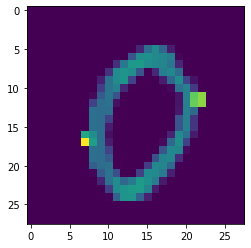

In [ ]:
i = int(input("Enter Any indices from 0 to 10,000 : "))
show_image(i)

In [ ]:
j = int(input("Enter the digit shown in figure which its index is {} : ".format(i)))
print("Result : ", test_predictions(i,j))

Enter the digit shown in figure which its index is 4675 : 0
Result :  True


Enter Any indices from 0 to 10,000 : 1983


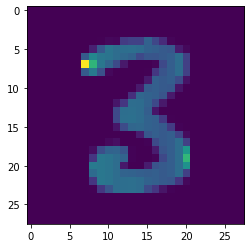

In [ ]:
i = int(input("Enter Any indices from 0 to 10,000 : "))
show_image(i)

In [ ]:
j = int(input("Enter the digit shown in figure which its index is {} : ".format(i)))
print("Result : ", test_predictions(i,j))

Enter the digit shown in figure which its index is 1983 : 4
Result :  False


In [ ]:
!jupyter nbconvert --to html handwritten_digit_recognition.ipynb

[NbConvertApp] Converting notebook handwritten_digit_recognition.ipynb to html
[NbConvertApp] Writing 427970 bytes to handwritten_digit_recognition.html
